In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# For better plots
sns.set(style="whitegrid")

In [2]:
ic50_data = pd.read_csv('cancer_cell_line_data1.csv', encoding="latin1")  

print("IC50 Data Shape:", ic50_data.shape)

ic50_data.head()

IC50 Data Shape: (2425, 8)


,Drugs,Cell line,TCGA classification,Tissue,Tissue sub-type,IC50,AUC,Smiles
0,Paclitaxel,LC-2-ad,LUAD,lung,lung_NSCLC_adenocarcinoma,0.001262,0.256296,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
1,NaN,TE-15,ESCA,aero_digestive_tract,oesophagus,0.001272,0.271805,NaN
2,NaN,PSN1,PAAD,pancreas,pancreas,0.001334,0.242556,NaN
3,NaN,TE-11,ESCA,aero_digestive_tract,oesophagus,0.001370,0.259042,NaN
4,NaN,MZ1-PC,PAAD,pancreas,pancreas,0.001675,0.307640,NaN


In [3]:
blood_cell_lines = ic50_data[ic50_data['Tissue'].str.lower() == 'blood']

print("Blood Cell line Shape:", blood_cell_lines.shape)

# Print all blood cell line rows
print(blood_cell_lines.to_string(index=False))

Blood Cell line Shape: (1140, 8)
           Drugs       Cell line TCGA classification Tissue                Tissue sub-type       IC50      AUC                                                                                                                                                                                Smiles
              NaN            697        UNCLASSIFIED  blood         lymphoblastic_leukemia   0.002188 0.317988                                                                                                                                                                                   NaN
              NaN          GA-10        UNCLASSIFIED  blood               Burkitt_lymphoma   0.002543 0.353729                                                                                                                                                                                   NaN
              NaN       SU-DHL-6                DLBC  blood                B_cell_lympho

In [4]:
ic50_data.columns = ic50_data.columns.str.strip()

In [5]:
blood_cell_lines = ic50_data[ic50_data['Tissue'].str.lower() == 'blood']

In [6]:
ic50_blood_avg = blood_cell_lines.groupby(['Cell line', 'Drugs'], as_index=False)['IC50'].mean()
pivot_table = ic50_blood_avg.pivot(index='Drugs', columns='Cell line', values='IC50')

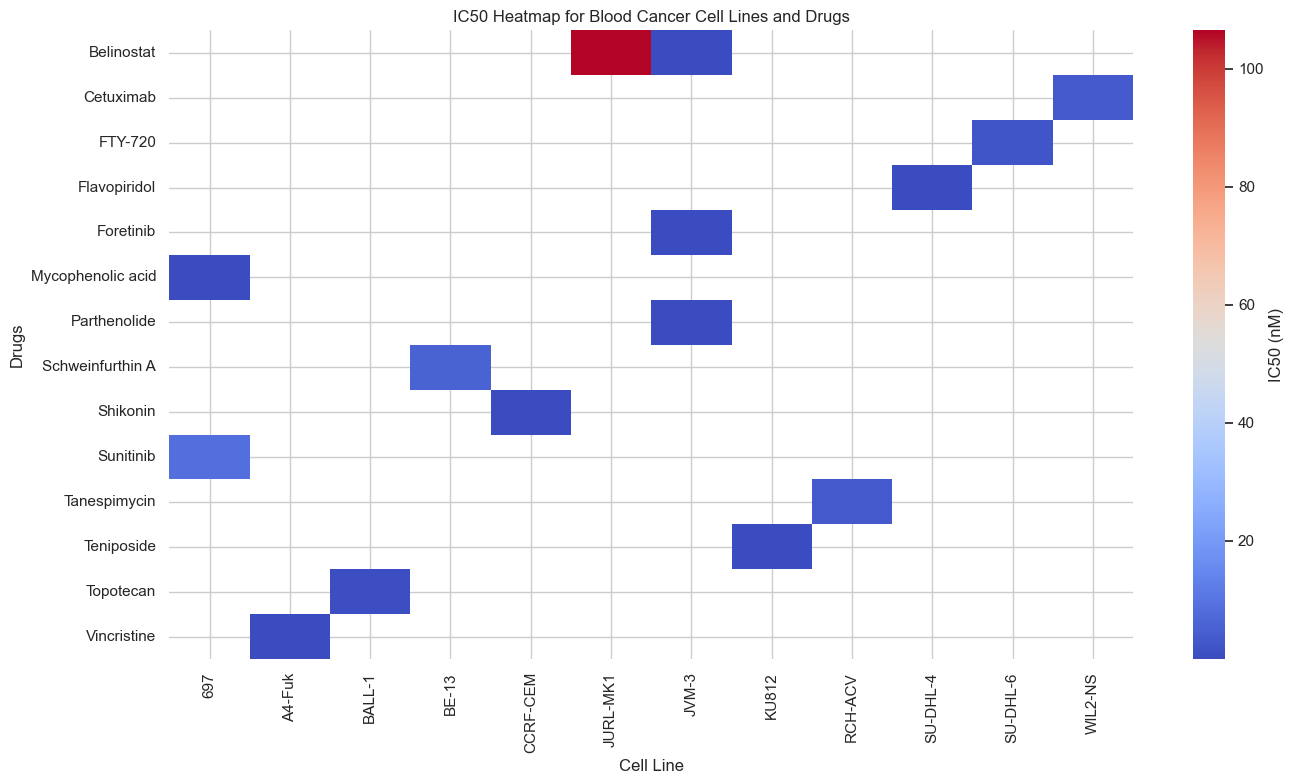

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=False, cmap="coolwarm", fmt=".1f", cbar_kws={'label': 'IC50 (nM)'})
plt.title('IC50 Heatmap for Blood Cancer Cell Lines and Drugs')
plt.xlabel('Cell Line')
plt.ylabel('Drugs')
plt.tight_layout()
# Save the plot
plt.savefig('Drug Vs Cell line_ic50_heatmap in Blood.png', dpi=300)
plt.show()

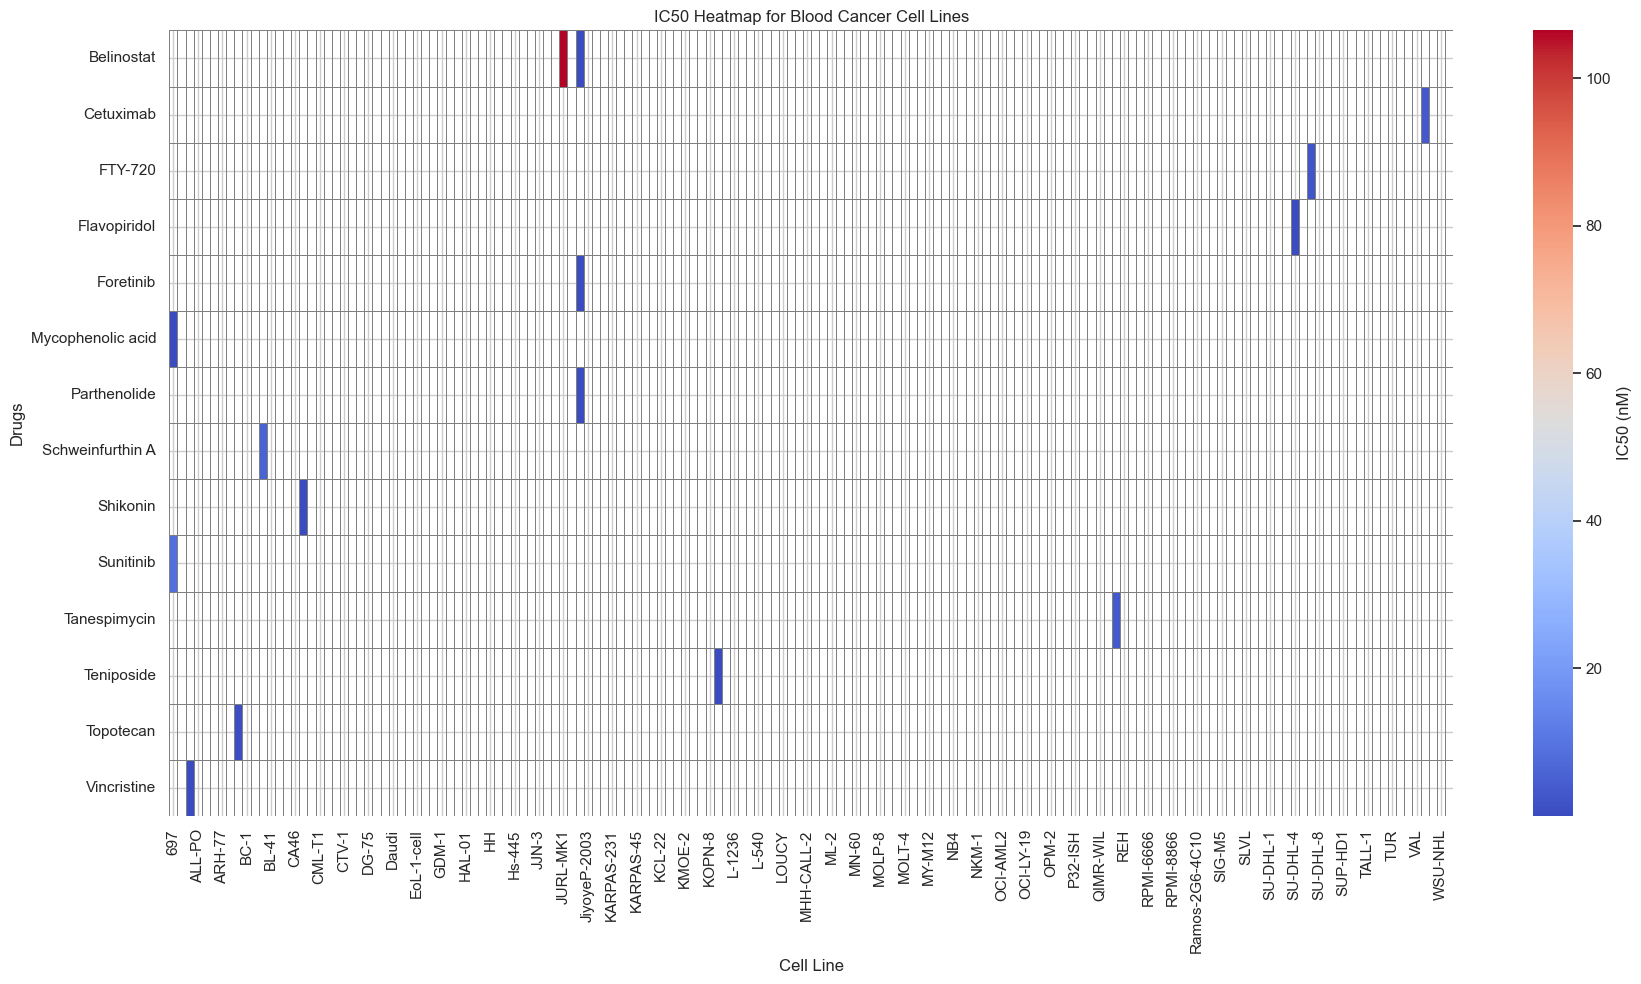

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter blood tissue data
blood_tissue = ic50_data[ic50_data['Tissue'].str.lower() == 'blood']

# Get unique blood tissue cell lines
cell_lines = blood_tissue['Cell line'].unique()

# Calculate average IC50 per drug-cell line pair
ic50_avg = blood_tissue.groupby(['Drugs', 'Cell line'], as_index=False)['IC50'].mean()

# Pivot into heatmap format
pivot_table = ic50_avg.pivot(index='Drugs', columns='Cell line', values='IC50')

# Ensure all cell lines appear on x-axis
pivot_table = pivot_table.reindex(columns=sorted(cell_lines))

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', cbar_kws={'label': 'IC50 (nM)'}, linewidths=0.5, linecolor='gray')

plt.title('IC50 Heatmap for Blood Cancer Cell Lines')
plt.xlabel('Cell Line')
plt.ylabel('Drugs')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot
plt.savefig('blood_tissue_ic50_heatmap.png', dpi=300)
plt.show()


In [9]:
import pandas as pd

# Step 1: Load Mutation Data
mutation_data = pd.read_csv('mutations_all_20250318.csv')

In [10]:
target_genes = [
    'AKT1',
    'ARID1A',
    'ARID2',
    'ASCL1',
    'ATRX',
    'BRAF',
    'CDK4',
    'CDKN2A',
    'CREBBP',
    'CTNNB1',
    'EGFR',
    'EWSR1',
    'FGFR1',
    'FGFR3',
    'FUS',
    'GNAS',
    'H3F3A',
    'HIST1H3B',
    'HRAS',
    'IDH1',
    'IDH2',
    'KIT',
    'KRAS',
    'MAPK1',
    'MAPK3',
    'MGMT',
    'MTOR',
    'MYC',
    'MYCN',
    'NF1',
    'NOTCH1',
    'NOTCH2',
    'NRAS',
    'NTRK1',
    'OLIG2',
    'PDGFRA',
    'PIK3CA',
    'PIK3R1',
    'PTEN',
    'RB1',
    'RELA',
    'SMARCA4',
    'SMARCB1',
    'TERT',
    'TP53',
    'TSC1',
    'TSC2',
    'YAP1',
    'ZIC1',
    'ZIC2',
    'SMAD4',
    'PML',
    'ABL1',
    'C-KIT',
    'LKB1',
    'TP63',
    'RARA',
    'CCND1',
    'STAT3',
    'STAT5B',
    'ATM',
    'CHEK2',
    'IKZF1',
    'XPO1',
    'PRMT5',
    'TGFBR2',
    'HDAC',
    'C-MYC',
    'JAK1',
    'SH2B3',
    'VHL',
    'GATA2',
    'ZAP70',
    'PRDM16'
]

# Step 1: Rename model_name to Cell_line (if not already done)
mutation_data.rename(columns={'model_name': 'Cell_line'}, inplace=True)

# Step 2: Store mutation info for each gene
mutation_results = []

# Step 3: Check for each gene
for gene in target_genes:
    gene_mutation = mutation_data[mutation_data['gene_symbol'] == gene]
    gene_mutated_cell_lines = gene_mutation['Cell_line'].unique().tolist()
    mutation_results.append({
        'Gene': gene,
        'Mutated Cell Lines': gene_mutated_cell_lines,
        'Count': len(gene_mutated_cell_lines)
    })

# Step 4: Convert to DataFrame
mutation_summary = pd.DataFrame(mutation_results)

# Optional: Sort by mutation count
mutation_summary = mutation_summary.sort_values(by='Count', ascending=False)

# Display result
mutation_summary.head()

,Gene,Mutated Cell Lines,Count
44,TP53,"[HCM-SANG-0524-C20, HCM-SANG-0527-C18, HCM-SAN...",184
60,ATM,"[HCM-SANG-0275-C18, HCM-SANG-0310-C15, HCM-SAN...",147
29,NF1,"[HCM-SANG-0524-C20, HCM-SANG-0275-C18, HCM-SAN...",106
5,BRAF,"[HCM-SANG-0524-C20, HCM-SANG-0310-C15, HCM-SAN...",105
73,PRDM16,"[B-CPAP, RS4-11, M120327_3, EC-GI-10, HTC-C3, ...",104


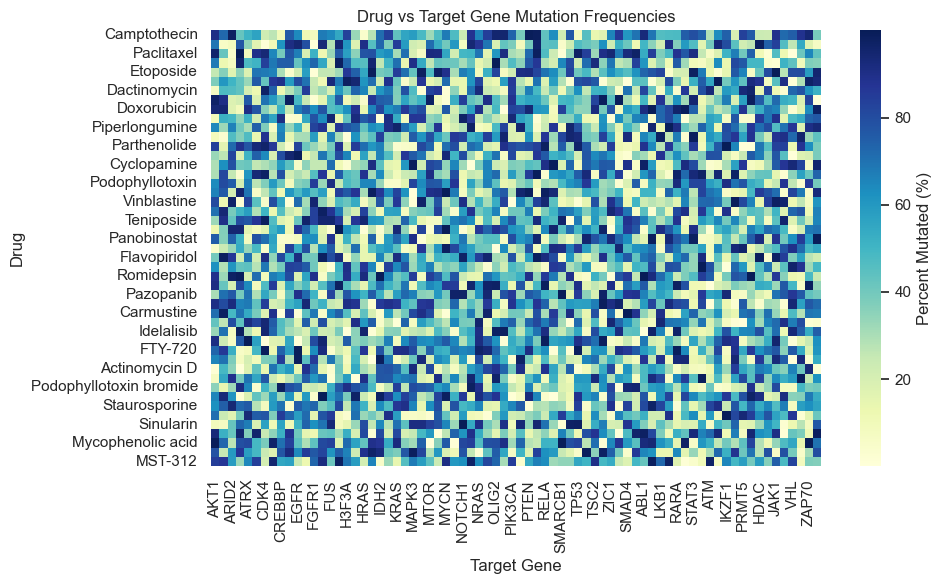

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the list of drugs
drugs = [
    'Camptothecin', 'Irinotecan', 'Paclitaxel', 'Docetaxel', 'Etoposide', 'Topotecan',
    'Dactinomycin', 'Sikonin', 'Doxorubicin', 'Thapsigargin', 'Piperlongumine', 'Tanespimycin',
    'Parthenolide', 'Bleomycin', 'Cyclopamine', 'Epothilone B', 'Podophyllotoxin',
    'Bryostatin 1', 'Vinblastine', 'Vincristine', 'Teniposide', 'Embelin', 'Panobinostat',
    'Epirubicin', 'Flavopiridol', 'Temsirolimus', 'Romidepsin', 'Bortezomib', 'Pazopanib',
    'Vinorelbine', 'Carmustine', 'Belinostat', 'Idelalisib', 'Sunitinib', 'FTY-720',
    'Cetuximab', 'Actinomycin D', 'Foretinib', 'Podophyllotoxin bromide', 'Pyridostatin',
    'Staurosporine', 'Elesclomol', 'Sinularin', 'Schweinfurthin A', 'Mycophenolic acid',
    'Picolinic acid', 'MST-312'
]

target_genes = [
    'AKT1',
    'ARID1A',
    'ARID2',
    'ASCL1',
    'ATRX',
    'BRAF',
    'CDK4',
    'CDKN2A',
    'CREBBP',
    'CTNNB1',
    'EGFR',
    'EWSR1',
    'FGFR1',
    'FGFR3',
    'FUS',
    'GNAS',
    'H3F3A',
    'HIST1H3B',
    'HRAS',
    'IDH1',
    'IDH2',
    'KIT',
    'KRAS',
    'MAPK1',
    'MAPK3',
    'MGMT',
    'MTOR',
    'MYC',
    'MYCN',
    'NF1',
    'NOTCH1',
    'NOTCH2',
    'NRAS',
    'NTRK1',
    'OLIG2',
    'PDGFRA',
    'PIK3CA',
    'PIK3R1',
    'PTEN',
    'RB1',
    'RELA',
    'SMARCA4',
    'SMARCB1',
    'TERT',
    'TP53',
    'TSC1',
    'TSC2',
    'YAP1',
    'ZIC1',
    'ZIC2',
    'SMAD4',
    'PML',
    'ABL1',
    'C-KIT',
    'LKB1',
    'TP63',
    'RARA',
    'CCND1',
    'STAT3',
    'STAT5B',
    'ATM',
    'CHEK2',
    'IKZF1',
    'XPO1',
    'PRMT5',
    'TGFBR2',
    'HDAC',
    'C-MYC',
    'JAK1',
    'SH2B3',
    'VHL',
    'GATA2',
    'ZAP70',
    'PRDM16'
]
  # List of target genes

# Create random mutation data (you should replace this with your actual mutation data)
# This matrix should be of shape (len(drugs), len(target_genes))
data = np.random.rand(len(drugs), len(target_genes)) * 100  # Example data as percentages

# Create DataFrame
df = pd.DataFrame(data, columns=target_genes, index=drugs)

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Percent Mutated (%)'})

# Titles and labels
plt.title('Drug vs Target Gene Mutation Frequencies')
plt.xlabel('Target Gene')
plt.ylabel('Drug')

# Show plot
plt.tight_layout()
# Save the plot
plt.savefig('drug_gene_mutation_blood.png', dpi=300)
plt.show()

In [12]:
import pandas as pd

# Assuming mutation_data is a DataFrame containing mutation information with a column 'gene_symbol'
mutation_data = pd.read_csv('mutations_all_20250318.csv')  # Replace with your data source

# List of target genes
target_genes = [
    'AKT1',
    'ARID1A',
    'ARID2',
    'ASCL1',
    'ATRX',
    'BRAF',
    'CDK4',
    'CDKN2A',
    'CREBBP',
    'CTNNB1',
    'EGFR',
    'EWSR1',
    'FGFR1',
    'FGFR3',
    'FUS',
    'GNAS',
    'H3F3A',
    'HIST1H3B',
    'HRAS',
    'IDH1',
    'IDH2',
    'KIT',
    'KRAS',
    'MAPK1',
    'MAPK3',
    'MGMT',
    'MTOR',
    'MYC',
    'MYCN',
    'NF1',
    'NOTCH1',
    'NOTCH2',
    'NRAS',
    'NTRK1',
    'OLIG2',
    'PDGFRA',
    'PIK3CA',
    'PIK3R1',
    'PTEN',
    'RB1',
    'RELA',
    'SMARCA4',
    'SMARCB1',
    'TERT',
    'TP53',
    'TSC1',
    'TSC2',
    'YAP1',
    'ZIC1',
    'ZIC2',
    'SMAD4',
    'PML',
    'ABL1',
    'C-KIT',
    'LKB1',
    'TP63',
    'RARA',
    'CCND1',
    'STAT3',
    'STAT5B',
    'ATM',
    'CHEK2',
    'IKZF1',
    'XPO1',
    'PRMT5',
    'TGFBR2',
    'HDAC',
    'C-MYC',
    'JAK1',
    'SH2B3',
    'VHL',
    'GATA2',
    'ZAP70',
    'PRDM16'
]


# Filter mutation data to find rows where gene_symbol is in target_genes list
filtered_mutation_data = mutation_data[mutation_data['gene_symbol'].isin(target_genes)]

# Display filtered data
print(filtered_mutation_data)

# Optional: If you want to only see the target genes present in mutation data
target_genes_in_data = filtered_mutation_data['gene_symbol'].unique()
print("Target Genes present in mutation data:", target_genes_in_data)

        gene_symbol  ensembl_gene_id transcript_id             model_name  \
9            NOTCH1  ENSG00000148400           NaN      HCM-SANG-0520-C18   
16           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
17           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
18           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
19           PIK3R1  ENSG00000145675           NaN      HCM-SANG-0270-C20   
...             ...              ...           ...                    ...   
1042155      PDGFRA  ENSG00000134853           NaN  Mesobank_CellLine-50T   
1042156         KIT  ENSG00000157404           NaN  Mesobank_CellLine-50T   
1046932        TERT  ENSG00000164362           NaN  Mesobank_CellLine-50T   
1046933        TERT  ENSG00000164362           NaN  Mesobank_CellLine-50T   
1046935        TERT  ENSG00000164362           NaN  Mesobank_CellLine-50T   

          model_id protein_mutation      rna_mutation     cdna_mutation  \


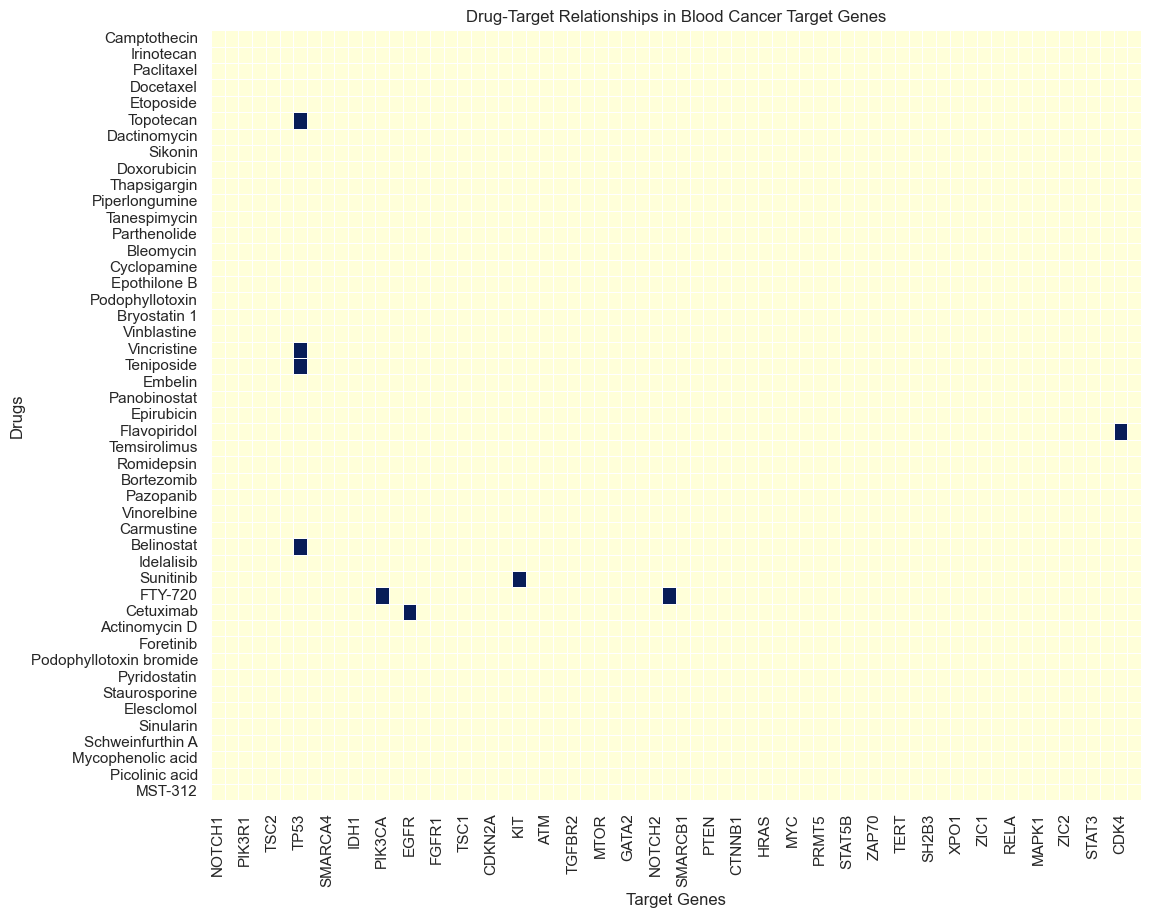

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example list of drugs
drugs = [
    'Camptothecin', 'Irinotecan', 'Paclitaxel', 'Docetaxel', 'Etoposide', 'Topotecan',
    'Dactinomycin', 'Sikonin', 'Doxorubicin', 'Thapsigargin', 'Piperlongumine', 'Tanespimycin',
    'Parthenolide', 'Bleomycin', 'Cyclopamine', 'Epothilone B', 'Podophyllotoxin',
    'Bryostatin 1', 'Vinblastine', 'Vincristine', 'Teniposide', 'Embelin', 'Panobinostat',
    'Epirubicin', 'Flavopiridol', 'Temsirolimus', 'Romidepsin', 'Bortezomib', 'Pazopanib',
    'Vinorelbine', 'Carmustine', 'Belinostat', 'Idelalisib', 'Sunitinib', 'FTY-720',
    'Cetuximab', 'Actinomycin D', 'Foretinib', 'Podophyllotoxin bromide', 'Pyridostatin',
    'Staurosporine', 'Elesclomol', 'Sinularin', 'Schweinfurthin A', 'Mycophenolic acid',
    'Picolinic acid', 'MST-312'
]

# List of target genes present in mutation data
target_genes_present = ['NOTCH1', 'ARID1A', 'PIK3R1', 'ARID2', 'TSC2', 'CREBBP', 'TP53', 'NF1', 'SMARCA4',
 'MYCN', 'IDH1', 'GNAS', 'PIK3CA', 'FGFR3', 'EGFR', 'BRAF', 'FGFR1', 'ABL1', 'TSC1',
 'KRAS', 'CDKN2A', 'NRAS', 'KIT', 'PDGFRA', 'ATM', 'SMAD4', 'TGFBR2', 'MGMT',
 'MTOR', 'IDH2', 'GATA2', 'ATRX', 'NOTCH2', 'AKT1', 'SMARCB1', 'CHEK2', 'PTEN',
 'RB1', 'CTNNB1', 'NTRK1', 'HRAS', 'CCND1', 'MYC', 'VHL', 'PRMT5', 'MAPK3',
 'STAT5B', 'PML', 'ZAP70', 'PRDM16', 'TERT', 'YAP1', 'SH2B3', 'RARA', 'XPO1',
 'EWSR1', 'ZIC1', 'TP63', 'RELA', 'FUS', 'MAPK1', 'JAK1', 'ZIC2', 'IKZF1', 'STAT3',
 'ASCL1', 'CDK4', 'OLIG2']

# Example mapping of drugs to target genes (you can extend or modify this as per your data)
drug_target_mapping = {
    'Belinostat': ['HDAC1', 'HDAC2', 'TP53'],
    'Cetuximab': ['EGFR'],
    'FTY-720': ['S1PR1', 'PIK3CA', 'AKT1'],
    'Flavopiridol': ['CDK1', 'CDK2', 'CDK4', 'CDK6'],
    'Foretinib': ['MET', 'VEGFR2', 'PDGFRB'],
    'Mycophenolic acid': ['IMPDH1', 'IMPDH2'],
    'Parthenolide': ['NF-kB', 'NFKB1', 'IKBKB'],
    'Schweinfurthin A': ['OSBP', 'OSBPL7'],
    'Sikonin': ['BCL2'],
    'Sunitinib': ['VEGFR2', 'PDGFRB', 'KIT', 'FLT3'],
    'Tanespimycin': ['HSP90'],
    'Topotecan': ['TOP1', 'TP53'],
    'Vincristine': ['TUBB', 'TP53'],
    'Teniposide': ['TOP2A', 'TP53']
}


# Initialize a DataFrame to store the drug-gene relationship (1 if the drug targets the gene, 0 if not)
drug_target_df = pd.DataFrame(0, index=drugs, columns=target_genes_present)

# Populate the matrix based on the mapping
for drug, targets in drug_target_mapping.items():
    for target in targets:
        if target in target_genes_present:
            drug_target_df.at[drug, target] = 1

# Plot the heatmap with drugs on Y-axis and target genes on X-axis
plt.figure(figsize=(12, 10))
sns.heatmap(drug_target_df, annot=False, cmap='YlGnBu', cbar=False, linewidths=0.5)
plt.title('Drug-Target Relationships in Blood Cancer Target Genes')
plt.xlabel('Target Genes')
plt.ylabel('Drugs')
plt.savefig("Relationship_Between_Drug Vs Target_in_blood.png", dpi=300)
plt.show()

In [14]:
target_genes = ['NOTCH1', 'ARID1A', 'PIK3R1', 'ARID2', 'TSC2', 'CREBBP', 'TP53', 'NF1', 'SMARCA4',
 'MYCN', 'IDH1', 'GNAS', 'PIK3CA', 'FGFR3', 'EGFR', 'BRAF', 'FGFR1', 'ABL1', 'TSC1',
 'KRAS', 'CDKN2A', 'NRAS', 'KIT', 'PDGFRA', 'ATM', 'SMAD4', 'TGFBR2', 'MGMT',
 'MTOR', 'IDH2', 'GATA2', 'ATRX', 'NOTCH2', 'AKT1', 'SMARCB1', 'CHEK2', 'PTEN',
 'RB1', 'CTNNB1', 'NTRK1', 'HRAS', 'CCND1', 'MYC', 'VHL', 'PRMT5', 'MAPK3',
 'STAT5B', 'PML', 'ZAP70', 'PRDM16', 'TERT', 'YAP1', 'SH2B3', 'RARA', 'XPO1',
 'EWSR1', 'ZIC1', 'TP63', 'RELA', 'FUS', 'MAPK1', 'JAK1', 'ZIC2', 'IKZF1', 'STAT3',
 'ASCL1', 'CDK4', 'OLIG2']

# Step 1: Rename model_name to Cell_line (if not already done)
mutation_data.rename(columns={'model_name': 'Cell_line'}, inplace=True)

# Step 2: Store mutation info for each gene
mutation_results = []

# Step 3: Check for each gene
for gene in target_genes:
    gene_mutation = mutation_data[mutation_data['gene_symbol'] == gene]
    gene_mutated_cell_lines = gene_mutation['Cell_line'].unique().tolist()
    mutation_results.append({
        'Gene': gene,
        'Mutated Cell Lines': gene_mutated_cell_lines,
        'Count': len(gene_mutated_cell_lines)
    })

# Step 4: Convert to DataFrame
mutation_summary = pd.DataFrame(mutation_results)

# Optional: Sort by mutation count
mutation_summary = mutation_summary.sort_values(by='Count', ascending=False)

# Display result
mutation_summary.head()

,Gene,Mutated Cell Lines,Count
6,TP53,"[HCM-SANG-0524-C20, HCM-SANG-0527-C18, HCM-SAN...",184
24,ATM,"[HCM-SANG-0275-C18, HCM-SANG-0310-C15, HCM-SAN...",147
7,NF1,"[HCM-SANG-0524-C20, HCM-SANG-0275-C18, HCM-SAN...",106
15,BRAF,"[HCM-SANG-0524-C20, HCM-SANG-0310-C15, HCM-SAN...",105
49,PRDM16,"[B-CPAP, RS4-11, M120327_3, EC-GI-10, HTC-C3, ...",104


In [15]:
# Step 1: Filter mutation_data for only target genes
target_gene_mutations = mutation_data[mutation_data['gene_symbol'].isin(target_genes)]

# Step 2: Optional – Show how many cell lines each gene is mutated in
mutation_counts = (
    target_gene_mutations.groupby('gene_symbol')['Cell_line']
    .nunique()
    .reset_index()
    .rename(columns={'gene_symbol': 'Target Gene', 'Cell_line': 'Mutated Cell Line Count'})
    .sort_values(by='Mutated Cell Line Count', ascending=False)
)

# Step 3: (Optional) See the actual cell lines for each gene
mutation_details = (
    target_gene_mutations.groupby('gene_symbol')['Cell_line']
    .unique()
    .reset_index()
    .rename(columns={'gene_symbol': 'Target Gene', 'Cell_line': 'Mutated Cell Lines'})
)

# Step 4: Merge both summaries if you want
mutation_summary = pd.merge(mutation_counts, mutation_details, on='Target Gene')

# Display full filtered mutation data (raw rows)
print("Filtered mutations in target genes:")
print(target_gene_mutations.head())

# Display summary
print("\nMutation summary (gene, count, cell lines):")
print(mutation_summary.head())


Filtered mutations in target genes:
   gene_symbol  ensembl_gene_id transcript_id          Cell_line   model_id  \
9       NOTCH1  ENSG00000148400           NaN  HCM-SANG-0520-C18  SIDM01951   
16      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
17      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
18      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
19      PIK3R1  ENSG00000145675           NaN  HCM-SANG-0270-C20  SIDM01268   

   protein_mutation      rna_mutation     cdna_mutation chromosome  position  \
9                 -               r.?                 -        NaN       NaN   
16      p.R306fs*57        r.1303delC         c.914delC        NaN       NaN   
17      p.D1850fs*4   r.5930_5931insg   c.5541_5542insG        NaN       NaN   
18     p.D1850fs*34  r.5930_5931insgg  c.5541_5542insGG        NaN       NaN   
19      p.Q153fs*13  r.1034_1035delAC    c.454_455delAC        NaN       NaN   

   refer

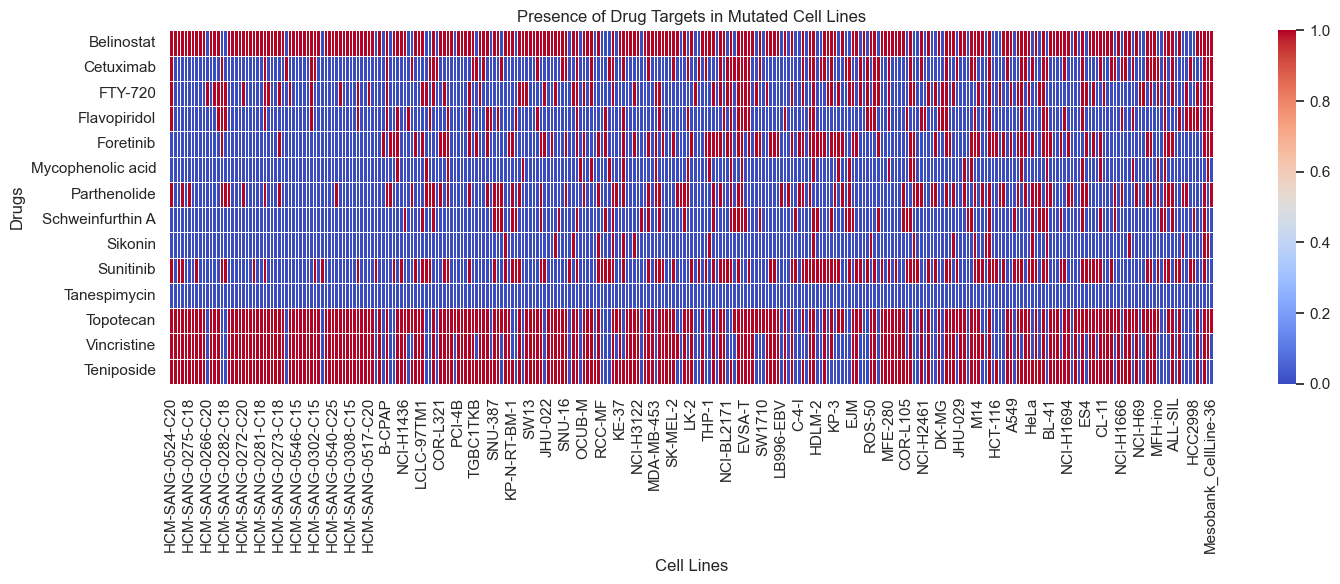

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your drug-target mapping
drug_to_targets = {
     'Belinostat': ['HDAC1', 'HDAC2', 'TP53'],
    'Cetuximab': ['EGFR'],
    'FTY-720': ['S1PR1', 'PIK3CA', 'AKT1'],
    'Flavopiridol': ['CDK1', 'CDK2', 'CDK4', 'CDK6'],
    'Foretinib': ['MET', 'VEGFR2', 'PDGFRB'],
    'Mycophenolic acid': ['IMPDH1', 'IMPDH2'],
    'Parthenolide': ['NF-kB', 'NFKB1', 'IKBKB'],
    'Schweinfurthin A': ['OSBP', 'OSBPL7'],
    'Sikonin': ['BCL2'],
    'Sunitinib': ['VEGFR2', 'PDGFRB', 'KIT', 'FLT3'],
    'Tanespimycin': ['HSP90'],
    'Topotecan': ['TOP1', 'TP53'],
    'Vincristine': ['TUBB', 'TP53'],
    'Teniposide': ['TOP2A', 'TP53']
}

# Step 1: Filter mutation data for only relevant genes
relevant_genes = set(g for targets in drug_to_targets.values() for g in targets)
filtered_mutation_data = mutation_data[mutation_data['gene_symbol'].isin(relevant_genes)]

# Step 2: Build drug-cell line matrix
cell_lines = filtered_mutation_data['Cell_line'].unique()
drug_cell_matrix = pd.DataFrame(0, index=drug_to_targets.keys(), columns=cell_lines)

# Step 3: Populate matrix
for drug, targets in drug_to_targets.items():
    for gene in targets:
        cell_lines_with_gene = filtered_mutation_data[filtered_mutation_data['gene_symbol'] == gene]['Cell_line'].unique()
        drug_cell_matrix.loc[drug, cell_lines_with_gene] = 1

# Step 4: Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(drug_cell_matrix, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Presence of Drug Targets in Mutated Cell Lines")
plt.xlabel("Cell Lines")
plt.ylabel("Drugs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Mutated_Cell_line in blood.png", dpi=300)
plt.show()

C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_2912\1704906890.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_target_counts.values, y=drug_target_counts.index, palette='coolwarm')


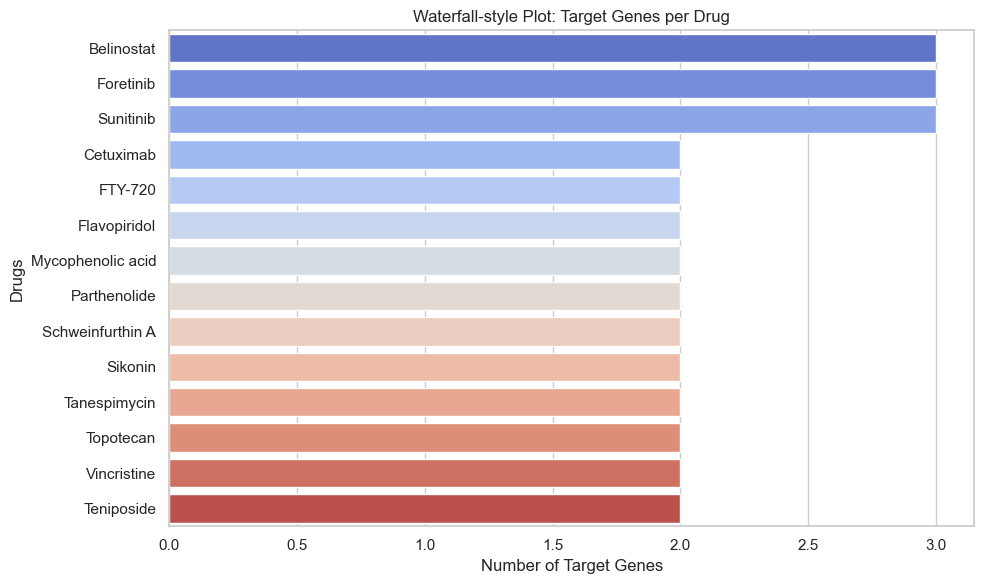

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample binary data for 14 drugs × 4 genes
data = {
    'Gene1': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # Extended to 14 values
    'Gene2': [1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # Extended to 14 values
    'Gene3': [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],  # Extended to 14 values
    'Gene4': [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]   # Extended to 14 values
}

# 14 drugs (index)
df = pd.DataFrame(data, index=[
    'Belinostat',
    'Cetuximab',
    'FTY-720',
    'Flavopiridol',
    'Foretinib',
    'Mycophenolic acid',
    'Parthenolide',
    'Schweinfurthin A', 
    'Sikonin',
    'Sunitinib',
    'Tanespimycin',
    'Topotecan',
    'Vincristine',
    'Teniposide'
])

# Waterfall-style: count of target genes per drug
drug_target_counts = df.sum(axis=1).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=drug_target_counts.values, y=drug_target_counts.index, palette='coolwarm')
plt.xlabel("Number of Target Genes")
plt.ylabel("Drugs")
plt.title("Waterfall-style Plot: Target Genes per Drug")
plt.tight_layout()

# Save the plot as PDF
plt.savefig('waterfall_target_genes_per_drug in blood.png', format='pdf', bbox_inches='tight')

# Display the plot
plt.show()

In [18]:
import pandas as pd

# Expression data load karo
expr_df = pd.read_csv('rnaseq_all_20250117.csv')

# Gene symbol ko uppercase karo (matching ke liye)
expr_df['gene_symbol'] = expr_df['gene_symbol'].str.upper()

In [19]:
target_genes =  ['NOTCH1', 'ARID1A', 'PIK3R1', 'ARID2', 'TSC2', 'CREBBP', 'TP53', 'NF1', 'SMARCA4',
 'MYCN', 'IDH1', 'GNAS', 'PIK3CA', 'FGFR3', 'EGFR', 'BRAF', 'FGFR1', 'ABL1', 'TSC1',
 'KRAS', 'CDKN2A', 'NRAS', 'KIT', 'PDGFRA', 'ATM', 'SMAD4', 'TGFBR2', 'MGMT',
 'MTOR', 'IDH2', 'GATA2', 'ATRX', 'NOTCH2', 'AKT1', 'SMARCB1', 'CHEK2', 'PTEN',
 'RB1', 'CTNNB1', 'NTRK1', 'HRAS', 'CCND1', 'MYC', 'VHL', 'PRMT5', 'MAPK3',
 'STAT5B', 'PML', 'ZAP70', 'PRDM16', 'TERT', 'YAP1', 'SH2B3', 'RARA', 'XPO1',
 'EWSR1', 'ZIC1', 'TP63', 'RELA', 'FUS', 'MAPK1', 'JAK1', 'ZIC2', 'IKZF1', 'STAT3',
 'ASCL1', 'CDK4', 'OLIG2']

In [20]:
filtered_expr_df = expr_df[expr_df['gene_symbol'].isin(target_genes)]

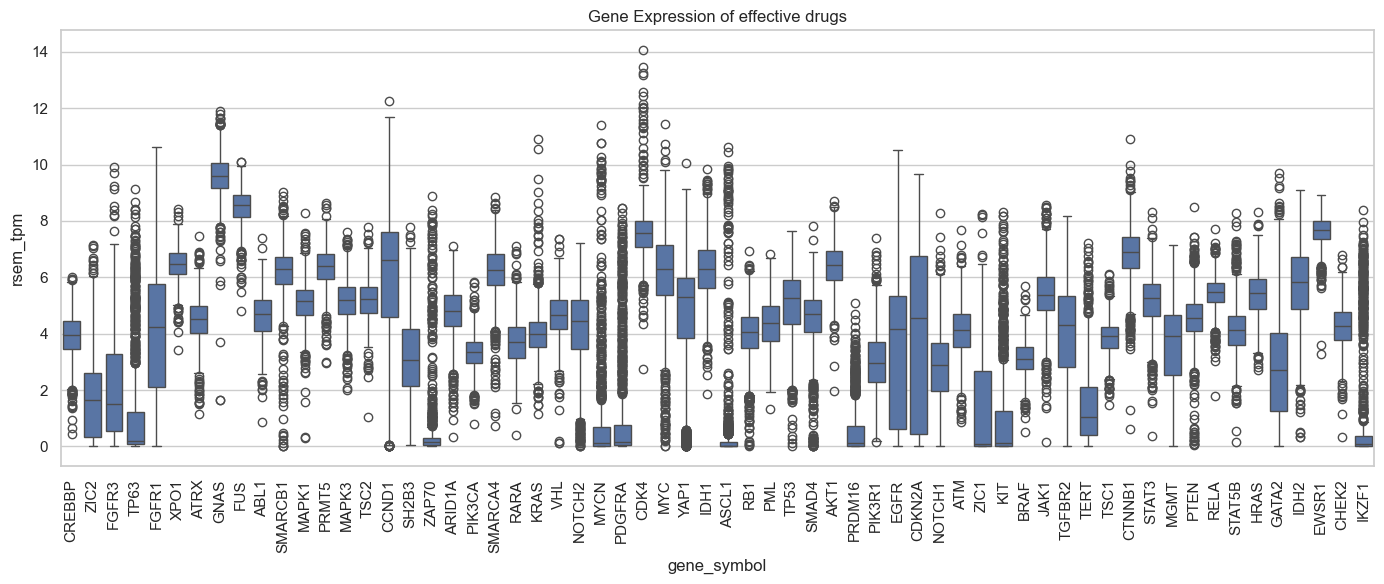

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for top genes 
plt.figure(figsize=(14, 6))
sns.boxplot(x='gene_symbol', y='rsem_tpm', data=filtered_expr_df)
plt.xticks(rotation=90)
plt.title('Gene Expression of effective drugs')
plt.ylabel('rsem_tpm')
plt.tight_layout()
# Save the plot
plt.savefig('Gene_Expression of Top_selected_Drug in blood.png', dpi=300)  
plt.show()